In [266]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import scipy.stats as st

from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt


***Clasificacion***

*Creacion de target*

Para esta tarea se debe crear una nueva variable tipo_precio que tendrá tres categorías:
alto, medio, bajo.

In [267]:
ds_clasificacion = pd.read_csv("properati_argentina_depurado_train.csv")
test = pd.read_csv("properati_argentina_depurado_test.csv")

In [268]:
ds_clasificacion["precioxm2"] = (ds_clasificacion["property_price"]/ds_clasificacion["property_surface_total"]).round(2)
test["precioxm2"] = (test["property_price"]/test["property_surface_total"]).round(2)
ds_clasificacion.drop(columns=["start_date", "end_date", "created_on", "property_title", "property_currency", "place_l2", "operation"], inplace=True)
ds_clasificacion.head(10)

,Unnamed: 0,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,geometry,cluster,precioxm2
0,161952,-34.540279,-58.464803,Nuñez,Departamento,3.0,2.0,61.0,56.00000,130000.0,POINT (-58.4648026 -34.5402794),0,2131.15
1,308773,-34.606780,-58.391341,San Nicolás,Departamento,2.0,1.0,73.0,62.00000,120000.0,POINT (-58.3913406 -34.6067798),0,1643.84
2,367023,-34.569511,-58.456376,Colegiales,Departamento,4.0,3.0,157.0,135.00000,400000.0,POINT (-58.4563764 -34.5695114),0,2547.77
3,180464,-34.587250,-58.446779,Chacarita,Departamento,2.0,1.0,36.0,36.00000,93000.0,POINT (-58.4467785464 -34.5872500576),0,2583.33
4,362258,-34.606312,-58.493226,Floresta,PH,3.0,2.0,45.0,45.00000,75000.0,POINT (-58.4932263 -34.6063121),1,1666.67
5,264439,-34.616614,-58.386901,Monserrat,Departamento,3.0,2.0,153.0,76.00000,170000.0,POINT (-58.3869012429 -34.6166137446),0,1111.11
6,238412,-34.631801,-58.475683,Floresta,Departamento,4.0,3.0,94.0,89.00000,138000.0,POINT (-58.475683 -34.631801),0,1468.09
7,76465,-34.550627,-58.453145,Nuñez,Departamento,3.0,2.0,72.0,72.00000,210000.0,POINT (-58.4531448 -34.5506271),0,2916.67
8,334407,-34.613457,-58.389443,Monserrat,Departamento,2.0,1.0,54.0,54.00000,75000.0,POINT (-58.3894425 -34.6134573),0,1388.89
9,157084,-34.563684,-58.468989,Coghlan,Departamento,2.0,1.0,62.0,35.22652,150000.0,POINT (-58.4689892 -34.5636844),0,2419.35


In [269]:
test.head()

,Unnamed: 0,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,precioxm2
0,20596,2021-03-15,2021-06-05,2021-03-15,-34.639950,-58.515535,Capital Federal,Liniers,Venta,Casa,3.0,2.0,135.290367,118.0,360000.0,USD,Casa - Liniers,2660.94
1,242322,2021-04-01,2021-04-19,2021-04-01,-34.568653,-58.443848,Capital Federal,Belgrano,Venta,Departamento,4.0,3.0,90.000000,77.0,235000.0,USD,DEPARTAMENTO 4 AMBIENTES CON COCHERA Y BAULERA,2611.11
2,277682,2021-12-23,2021-12-30,2021-12-23,-34.587665,-58.405687,Capital Federal,Barrio Norte,Venta,Departamento,2.0,1.0,54.471818,37.0,68000.0,USD,Departamento 2 ambientes muy bien ubicado - B...,1248.35
3,381307,2021-07-08,2021-07-12,2021-07-08,-34.599013,-58.414947,Capital Federal,Palermo,Venta,Departamento,3.0,2.0,62.000000,56.0,134000.0,USD,"3 ambientes con balcon, toilette. Amplia baule...",2161.29
4,436509,2021-08-25,2021-09-07,2021-08-25,-34.620909,-58.375847,Capital Federal,San Telmo,Venta,Departamento,3.0,2.0,66.000000,60.0,149000.0,USD,Venta Departamento Dúplex 3 Ambientes Balcón S...,2257.58


Igual Frecuencia

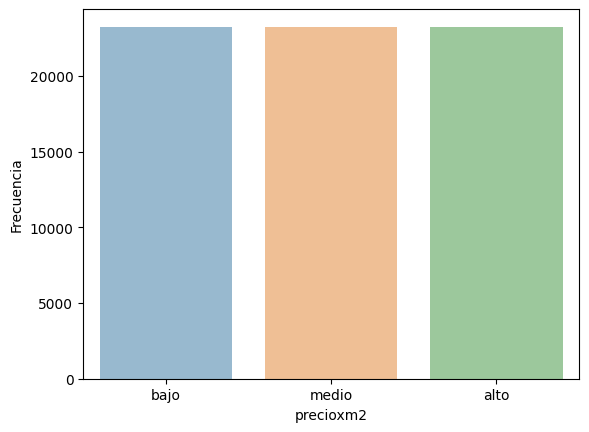

In [270]:
labels=["bajo","medio","alto"]

ds_clasificacion["precioxm2_igual_frec"]=pd.qcut(ds_clasificacion["precioxm2"],q=3, labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion.groupby(['precioxm2_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

Por cuantiles

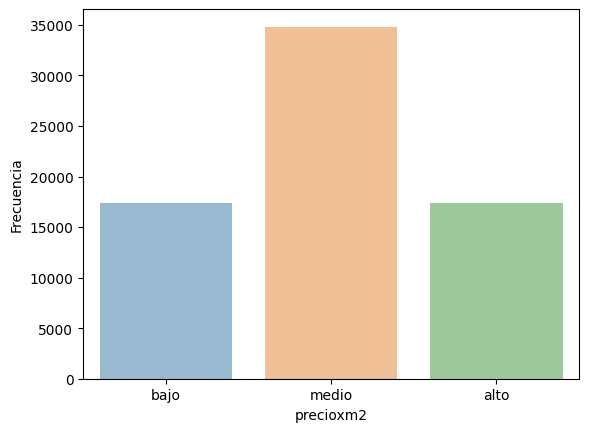

In [271]:
labels=["bajo","medio","alto"]
ds_clasificacion["precioxm2_q"]=pd.qcut(ds_clasificacion["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion.groupby(['precioxm2_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

In [272]:
quantil_menor=ds_clasificacion["precioxm2"].quantile(q=0.25)
quantil_mayor=ds_clasificacion["precioxm2"].quantile(q=0.75)
test["precioxm2_q"]= pd.NA
test.loc[test["precioxm2"]<quantil_menor,"precioxm2_q"] = "bajo"
test.loc[test["precioxm2"]>quantil_mayor,"precioxm2_q"] = "alto"
test.loc[(test["precioxm2"]<=quantil_mayor) & (test["precioxm2"]>=quantil_menor),"precioxm2_q"] = "alto" 

Por viviendas

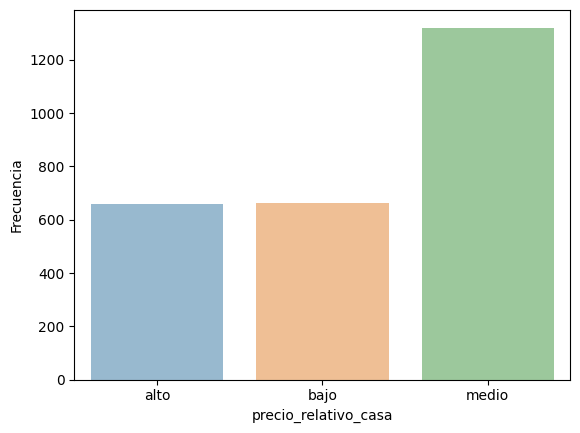

In [273]:
ds_clasificacion["precioxm2_relativo_q"] = np.nan
labels=["bajo","medio","alto"]
ds_clasificacion.loc[ds_clasificacion["property_type"] == "Casa", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "Casa"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_clasificacion.loc[ds_clasificacion["property_type"] == "Departamento", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "Departamento"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_clasificacion.loc[ds_clasificacion["property_type"] == "PH", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "PH"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion[ds_clasificacion["property_type"] == "Casa"].groupby(['precioxm2_relativo_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precio_relativo_casa')
plt.show()

In [274]:
# labels=["bajo","medio","alto"]
# ds_clasificacion["precio_recorrido_discret_q_libres_PH"]=pd.cut(ds_clasificacion["precioxm2"],bins=3, labels=labels)

# #Gráfico de barras con Seaborn
# ds_agrupado_precioxm2=ds_clasificacion.groupby(['precio_recorrido_discret_q_libres_PH']).count()  #Calculo la frecuencia de cada categoría

# eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
# eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

# sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2_PH')
# plt.show()

distribuicion de precios

<AxesSubplot: >

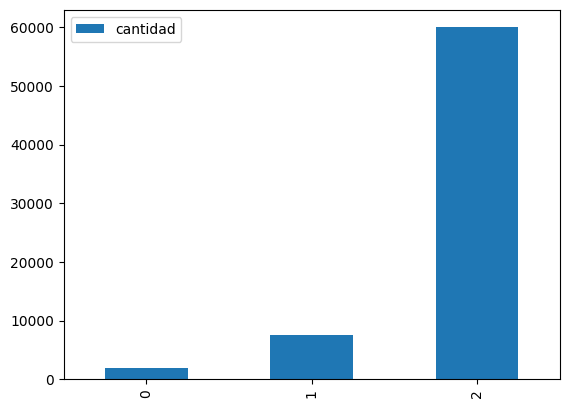

In [275]:
precio_bajo = (ds_clasificacion[ds_clasificacion["precioxm2"]<1000]).shape[0]
precio_medio = (ds_clasificacion[ds_clasificacion["precioxm2"]>=1000]).shape[0] - (ds_clasificacion[ds_clasificacion["precioxm2"]>=1500]).shape[0]
precio_alto = (ds_clasificacion[ds_clasificacion["precioxm2"]>=1500]).shape[0]

df_precios = pd.DataFrame(list(zip(["bajo","medio","alto"], [precio_bajo, precio_medio, precio_alto])), columns=["clasificacion", "cantidad"])
df_precios.plot.bar()

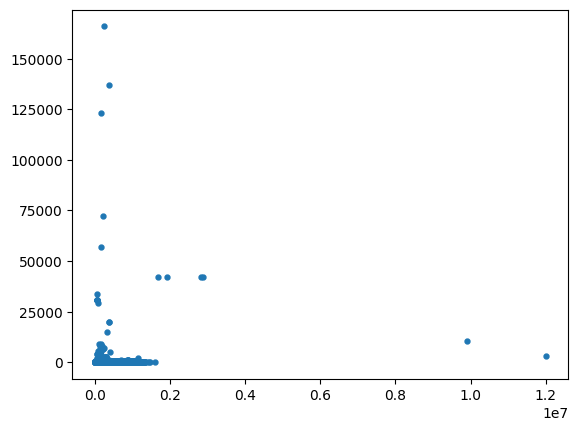

In [276]:
from sklearn.cluster import KMeans

#Generamos un dataset sintético
xy= ds_clasificacion[["property_price","property_surface_total"]]

plt.scatter(xy["property_price"], xy["property_surface_total"], s=50,marker='.')
plt.show()
kmeans = KMeans(n_clusters=3)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(xy) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(xy)



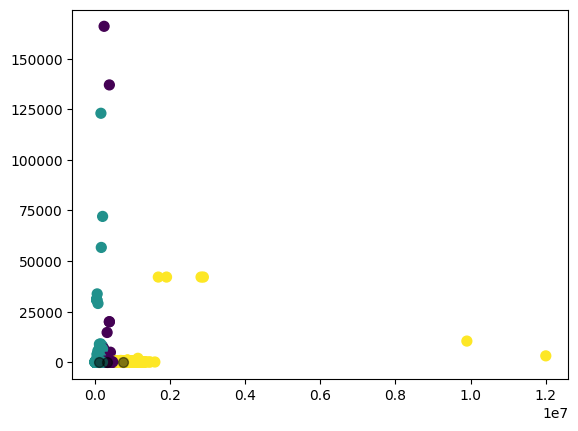

In [277]:
plt.scatter(xy["property_price"], xy["property_surface_total"], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Viendo los resultados notamos que la clasificacion por clusters no es correspondiente a las anteriores clasificaciones ya que no es muy precisa al tomar en cuenta la superficie total

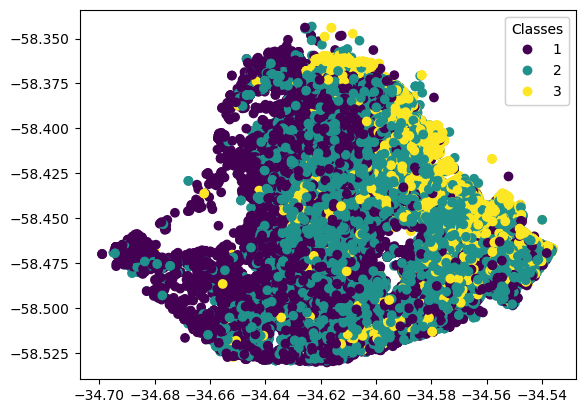

In [278]:
fig, ax = plt.subplots()
x=ds_clasificacion["latitud"]
y=ds_clasificacion["longitud"]
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "bajo",'color'] = 1
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "medio",'color'] = 2
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "alto",'color'] = 3

scatter = ax.scatter(x, y, c=ds_clasificacion['color'])
legend1 = ax.legend(*scatter.legend_elements(),
                     title="Classes")
ax.add_artist(legend1)
plt.show()

Como podemos observar, las viviendas de mayor valor se ubican en la zona este/norte de la ciudad, lo que es bastante coincidente a la realidad.

# **Entrenamiento y Predicción

Predeciccion del valor del atributo tipo_precio,

In [279]:
ds_clasificacion.isna().sum()

Unnamed: 0                  0
latitud                     0
longitud                    0
place_l3                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
geometry                    0
cluster                     0
precioxm2                   0
precioxm2_igual_frec        0
precioxm2_q                 0
precioxm2_relativo_q        0
color                       0
dtype: int64

In [280]:
#ds_clasificacion.drop()

In [281]:
ds_clasificacion.head(10)

,Unnamed: 0,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,geometry,cluster,precioxm2,precioxm2_igual_frec,precioxm2_q,precioxm2_relativo_q,color
0,161952,-34.540279,-58.464803,Nuñez,Departamento,3.0,2.0,61.0,56.00000,130000.0,POINT (-58.4648026 -34.5402794),0,2131.15,medio,medio,medio,2.0
1,308773,-34.606780,-58.391341,San Nicolás,Departamento,2.0,1.0,73.0,62.00000,120000.0,POINT (-58.3913406 -34.6067798),0,1643.84,bajo,bajo,bajo,1.0
2,367023,-34.569511,-58.456376,Colegiales,Departamento,4.0,3.0,157.0,135.00000,400000.0,POINT (-58.4563764 -34.5695114),0,2547.77,alto,medio,medio,2.0
3,180464,-34.587250,-58.446779,Chacarita,Departamento,2.0,1.0,36.0,36.00000,93000.0,POINT (-58.4467785464 -34.5872500576),0,2583.33,alto,medio,medio,2.0
4,362258,-34.606312,-58.493226,Floresta,PH,3.0,2.0,45.0,45.00000,75000.0,POINT (-58.4932263 -34.6063121),1,1666.67,bajo,bajo,medio,1.0
5,264439,-34.616614,-58.386901,Monserrat,Departamento,3.0,2.0,153.0,76.00000,170000.0,POINT (-58.3869012429 -34.6166137446),0,1111.11,bajo,bajo,bajo,1.0
6,238412,-34.631801,-58.475683,Floresta,Departamento,4.0,3.0,94.0,89.00000,138000.0,POINT (-58.475683 -34.631801),0,1468.09,bajo,bajo,bajo,1.0
7,76465,-34.550627,-58.453145,Nuñez,Departamento,3.0,2.0,72.0,72.00000,210000.0,POINT (-58.4531448 -34.5506271),0,2916.67,alto,alto,alto,3.0
8,334407,-34.613457,-58.389443,Monserrat,Departamento,2.0,1.0,54.0,54.00000,75000.0,POINT (-58.3894425 -34.6134573),0,1388.89,bajo,bajo,bajo,1.0
9,157084,-34.563684,-58.468989,Coghlan,Departamento,2.0,1.0,62.0,35.22652,150000.0,POINT (-58.4689892 -34.5636844),0,2419.35,medio,medio,medio,2.0


In [282]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

In [283]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn.preprocessing import MinMaxScaler

In [284]:
#dropeamos los que no sirven

C:\Users\ivanp\AppData\Local\Temp\ipykernel_19132\1191091085.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion=ds_clasificacion.corr()


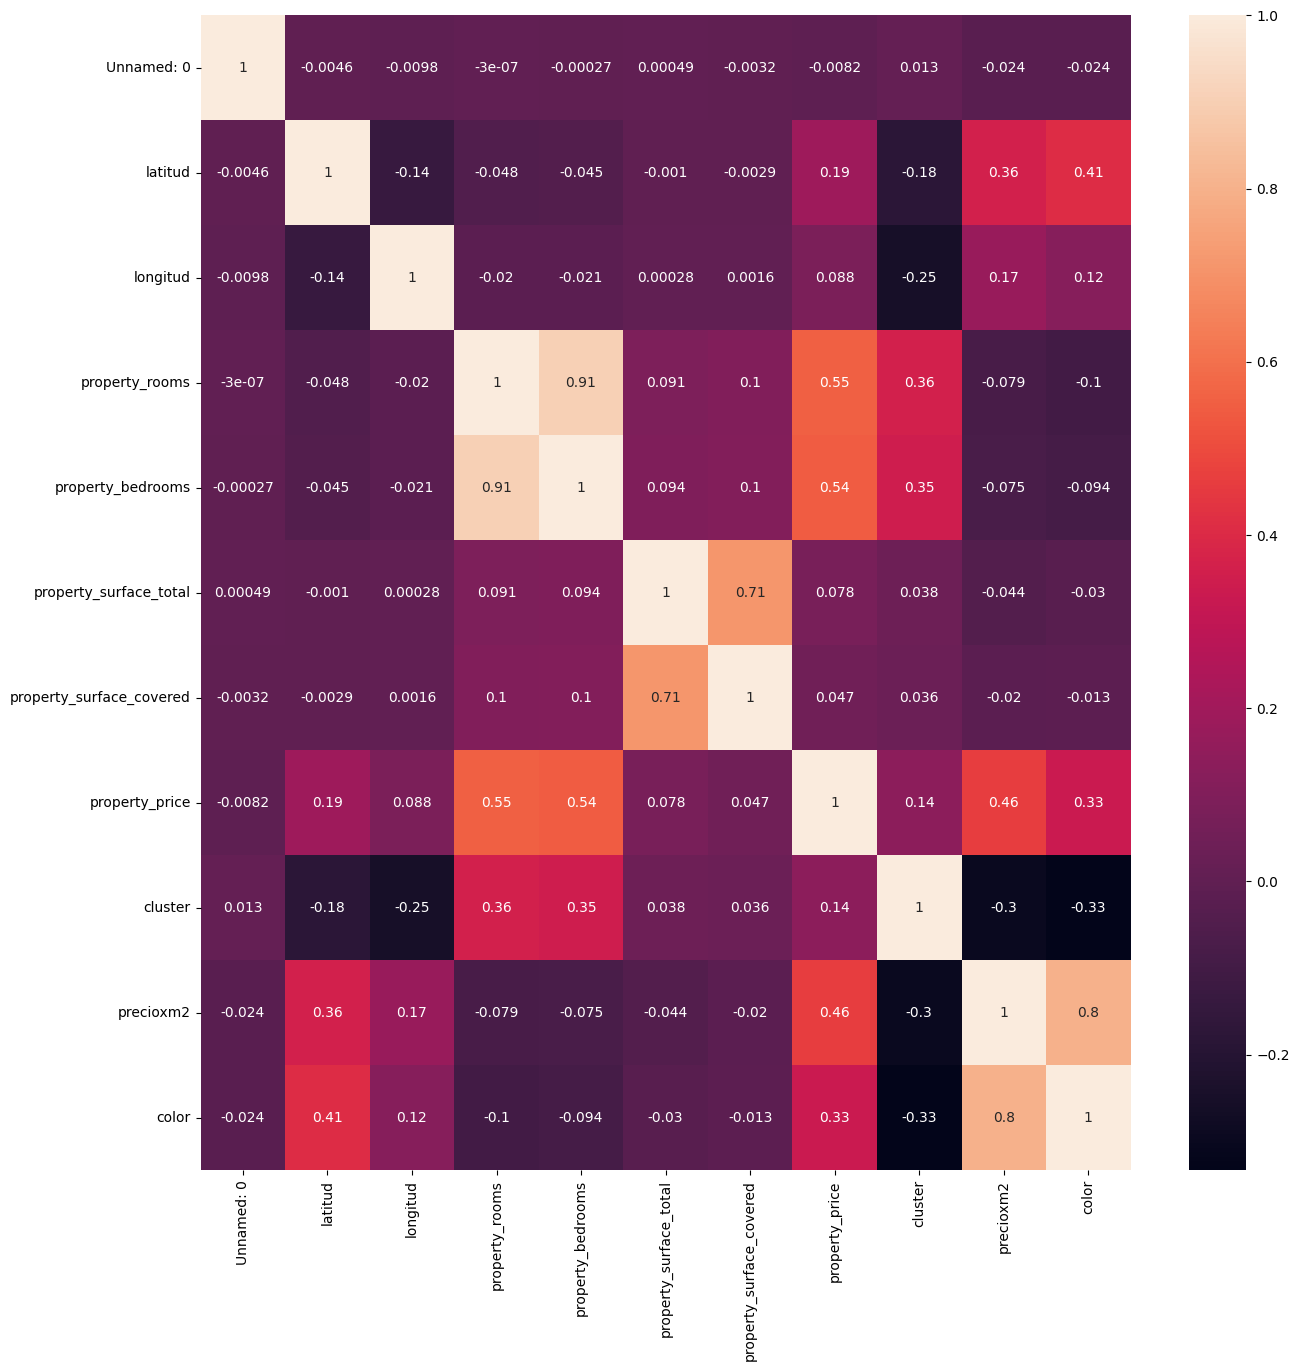

In [285]:
matriz_correlacion=ds_clasificacion.corr()

plt.figure(figsize=(15,15))
sns.heatmap(matriz_correlacion, annot = True)
plt.show()

In [286]:
ds_clasificacion

,Unnamed: 0,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,geometry,cluster,precioxm2,precioxm2_igual_frec,precioxm2_q,precioxm2_relativo_q,color
0,161952,-34.540279,-58.464803,Nuñez,Departamento,3.0,2.0,61.0,56.0,130000.0,POINT (-58.4648026 -34.5402794),0,2131.15,medio,medio,medio,2.0
1,308773,-34.606780,-58.391341,San Nicolás,Departamento,2.0,1.0,73.0,62.0,120000.0,POINT (-58.3913406 -34.6067798),0,1643.84,bajo,bajo,bajo,1.0
2,367023,-34.569511,-58.456376,Colegiales,Departamento,4.0,3.0,157.0,135.0,400000.0,POINT (-58.4563764 -34.5695114),0,2547.77,alto,medio,medio,2.0
3,180464,-34.587250,-58.446779,Chacarita,Departamento,2.0,1.0,36.0,36.0,93000.0,POINT (-58.4467785464 -34.5872500576),0,2583.33,alto,medio,medio,2.0
4,362258,-34.606312,-58.493226,Floresta,PH,3.0,2.0,45.0,45.0,75000.0,POINT (-58.4932263 -34.6063121),1,1666.67,bajo,bajo,medio,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69640,108573,-34.654809,-58.404746,Pompeya,Departamento,3.0,2.0,59.0,59.0,55000.0,POINT (-58.404746 -34.654809),0,932.20,bajo,bajo,bajo,1.0
69641,238236,-34.581673,-58.443382,Palermo,Departamento,1.0,1.0,40.0,35.0,110000.0,POINT (-58.443382 -34.581673),0,2750.00,alto,alto,medio,3.0
69642,221078,-34.597355,-58.395413,Recoleta,Departamento,3.0,2.0,101.0,91.0,207000.0,POINT (-58.3954126 -34.597355),0,2049.50,medio,medio,medio,2.0
69643,226504,-34.607323,-58.512419,Villa Devoto,Departamento,3.0,2.0,65.0,57.0,120000.0,POINT (-58.512419 -34.607323),0,1846.15,bajo,medio,bajo,2.0


In [287]:
features=['property_rooms','property_bedrooms','property_surface_total','property_surface_covered','latitud','longitud']
          
target='precioxm2_q'

In [288]:
#Verifico balanceo de clases
ds_clasificacion[target].value_counts(normalize=True)*100 #capaz tendriamos que tomar uno que este mas balanceado

medio    49.997846
bajo     25.002513
alto     24.999641
Name: precioxm2_q, dtype: float64

In [289]:
test.head()

,Unnamed: 0,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,precioxm2,precioxm2_q
0,20596,2021-03-15,2021-06-05,2021-03-15,-34.639950,-58.515535,Capital Federal,Liniers,Venta,Casa,3.0,2.0,135.290367,118.0,360000.0,USD,Casa - Liniers,2660.94,alto
1,242322,2021-04-01,2021-04-19,2021-04-01,-34.568653,-58.443848,Capital Federal,Belgrano,Venta,Departamento,4.0,3.0,90.000000,77.0,235000.0,USD,DEPARTAMENTO 4 AMBIENTES CON COCHERA Y BAULERA,2611.11,alto
2,277682,2021-12-23,2021-12-30,2021-12-23,-34.587665,-58.405687,Capital Federal,Barrio Norte,Venta,Departamento,2.0,1.0,54.471818,37.0,68000.0,USD,Departamento 2 ambientes muy bien ubicado - B...,1248.35,bajo
3,381307,2021-07-08,2021-07-12,2021-07-08,-34.599013,-58.414947,Capital Federal,Palermo,Venta,Departamento,3.0,2.0,62.000000,56.0,134000.0,USD,"3 ambientes con balcon, toilette. Amplia baule...",2161.29,alto
4,436509,2021-08-25,2021-09-07,2021-08-25,-34.620909,-58.375847,Capital Federal,San Telmo,Venta,Departamento,3.0,2.0,66.000000,60.0,149000.0,USD,Venta Departamento Dúplex 3 Ambientes Balcón S...,2257.58,alto


In [290]:

x_train = ds_clasificacion[features]
x_test = test[features]
y_train= ds_clasificacion[target]
y_test= test[target]



In [291]:
print(y_test)

0        alto
1        alto
2        bajo
3        alto
4        alto
         ... 
17831    alto
17832    alto
17833    alto
17834    bajo
17835    alto
Name: precioxm2_q, Length: 17836, dtype: object


In [292]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from ensurepip import bootstrap
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer,f1_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier



#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(1,10)),
               'min_samples_split': list(range(12,20)),
               'ccp_alpha':np.linspace(0.001,0.005,n), 
               'max_depth':list(range(5,6))}
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': array([0.001     , 0.00144444, 0.00188889, 0.00233333, 0.00277778,
       0.00322222, 0.00366667, 0.00411111, 0.00455556, 0.005     ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [12, 13, 14, 15,
                                                              16, 17, 18, 19]},
                   scoring=make_scorer(f1_score, average=micro))

In [293]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 19, 'min_samples_leaf': 7, 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.001888888888888889}
0.6004738315744131


In [294]:
randomcv.cv_results_['mean_test_score']

array([0.60047383, 0.59684112, 0.57537512, 0.57959653, 0.5980616 ,
       0.59000646, 0.59429966, 0.5980616 , 0.5980616 , 0.59595089])

In [295]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.0
property_rooms: 0.0
property_surface_covered: 0.0
property_surface_total: 0.14797180484254968
longitud: 0.2422601716647759
latitud: 0.6097680234926744


In [296]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
print(reglas)

|--- latitud <= -34.60
|   |--- longitud <= -58.37
|   |   |--- property_surface_total <= 86.22
|   |   |   |--- longitud <= -58.42
|   |   |   |   |--- latitud <= -34.63
|   |   |   |   |   |--- class: bajo
|   |   |   |   |--- latitud >  -34.63
|   |   |   |   |   |--- class: medio
|   |   |   |--- longitud >  -58.42
|   |   |   |   |--- property_surface_total <= 37.87
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- property_surface_total >  37.87
|   |   |   |   |   |--- class: bajo
|   |   |--- property_surface_total >  86.22
|   |   |   |--- property_surface_total <= 201.79
|   |   |   |   |--- latitud <= -34.64
|   |   |   |   |   |--- class: bajo
|   |   |   |   |--- latitud >  -34.64
|   |   |   |   |   |--- class: bajo
|   |   |   |--- property_surface_total >  201.79
|   |   |   |   |--- class: bajo
|   |--- longitud >  -58.37
|   |   |--- latitud <= -34.63
|   |   |   |--- class: bajo
|   |   |--- latitud >  -34.63
|   |   |   |--- class: alto
|--- latitud >  -34.

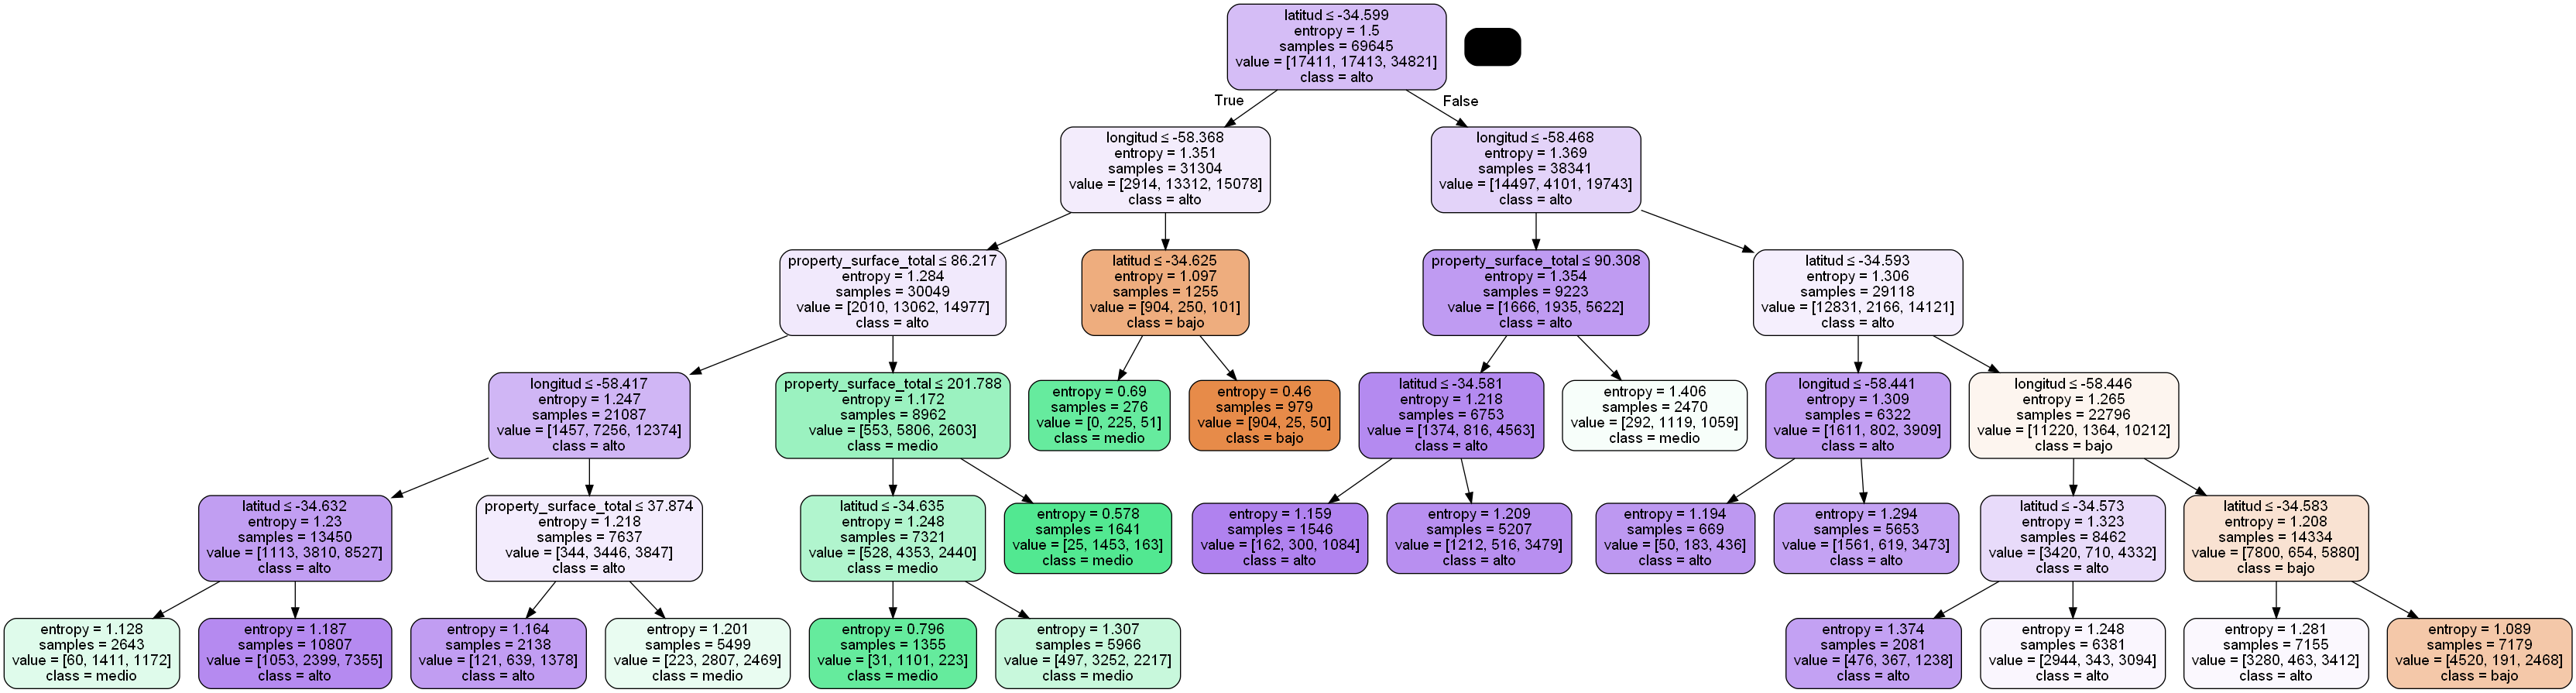

In [297]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

***explicacion***

Text(50.722222222222214, 0.5, 'True')

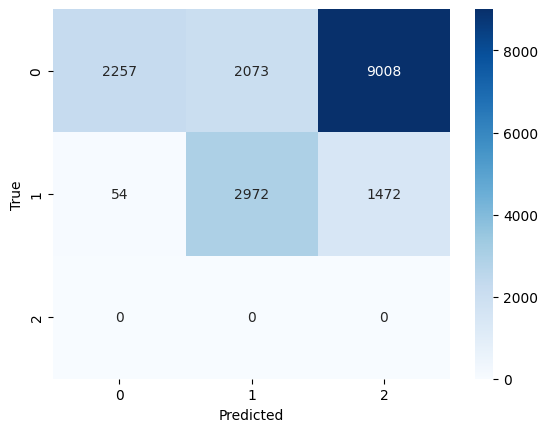

In [298]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')



# Random Forest


In [299]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from scipy.stats import randint as sp_randInt


x_train = ds_clasificacion[features]
x_test = test[features]
y_train= ds_clasificacion[target]
y_test= test[target]



#Cantidad de combinaciones que quiero porbar
n=4

#Conjunto de parámetros que quiero usar
#param_grid_rf = {'n_estimators': randint(4,200),'max_depth': [6,7,8], 'min_samples_split': uniform(0.01, 0.199) }


param_grid_rf = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(1,10)),
               'min_samples_split': uniform(0.01, 0.199),
               'ccp_alpha':np.linspace(0,0.15,n), 
               'max_depth':list(range(5,6))}
                






#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree_rf = RandomForestClassifier()#n_estimators=648


#Metrica que quiero optimizar F1 Score
from sklearn.metrics import make_scorer, roc_auc_score, recall_score, matthews_corrcoef, balanced_accuracy_score, accuracy_score
scorer_fn = make_scorer(f1_score, average='micro')

#scoring = {"roc_auc_score": new_auc, "recall": recall, "MCC" : mcc, 'Bal_acc' : bal_acc, "Accuracy": acc }

#scoring = {"roc_auc_score": auc_score, "recall": recall, "MCC" : mcc, 'Bal_acc' : bal_acc, "Accuracy": acc }
#Random Search Cross Validation
randomcv_rf = RandomizedSearchCV(estimator=base_tree_rf,
                              param_distributions = param_grid_rf,
                               cv=kfoldcv,
                            scoring = scorer_fn,
                            n_jobs=-1)
randomcv_rf.fit(x_train,y_train)


randomcv_rf.best_estimator_

In [ ]:
print(randomcv_rf.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 0.09697158346856956}


In [ ]:
arbol_rf=DecisionTreeClassifier().set_params(**randomcv_rf.best_params_)

#Entreno el arbol en todo el set
arbol_rf.fit(x_train,y_train)

reglas_rf = export_text(arbol_rf, feature_names=list(features))

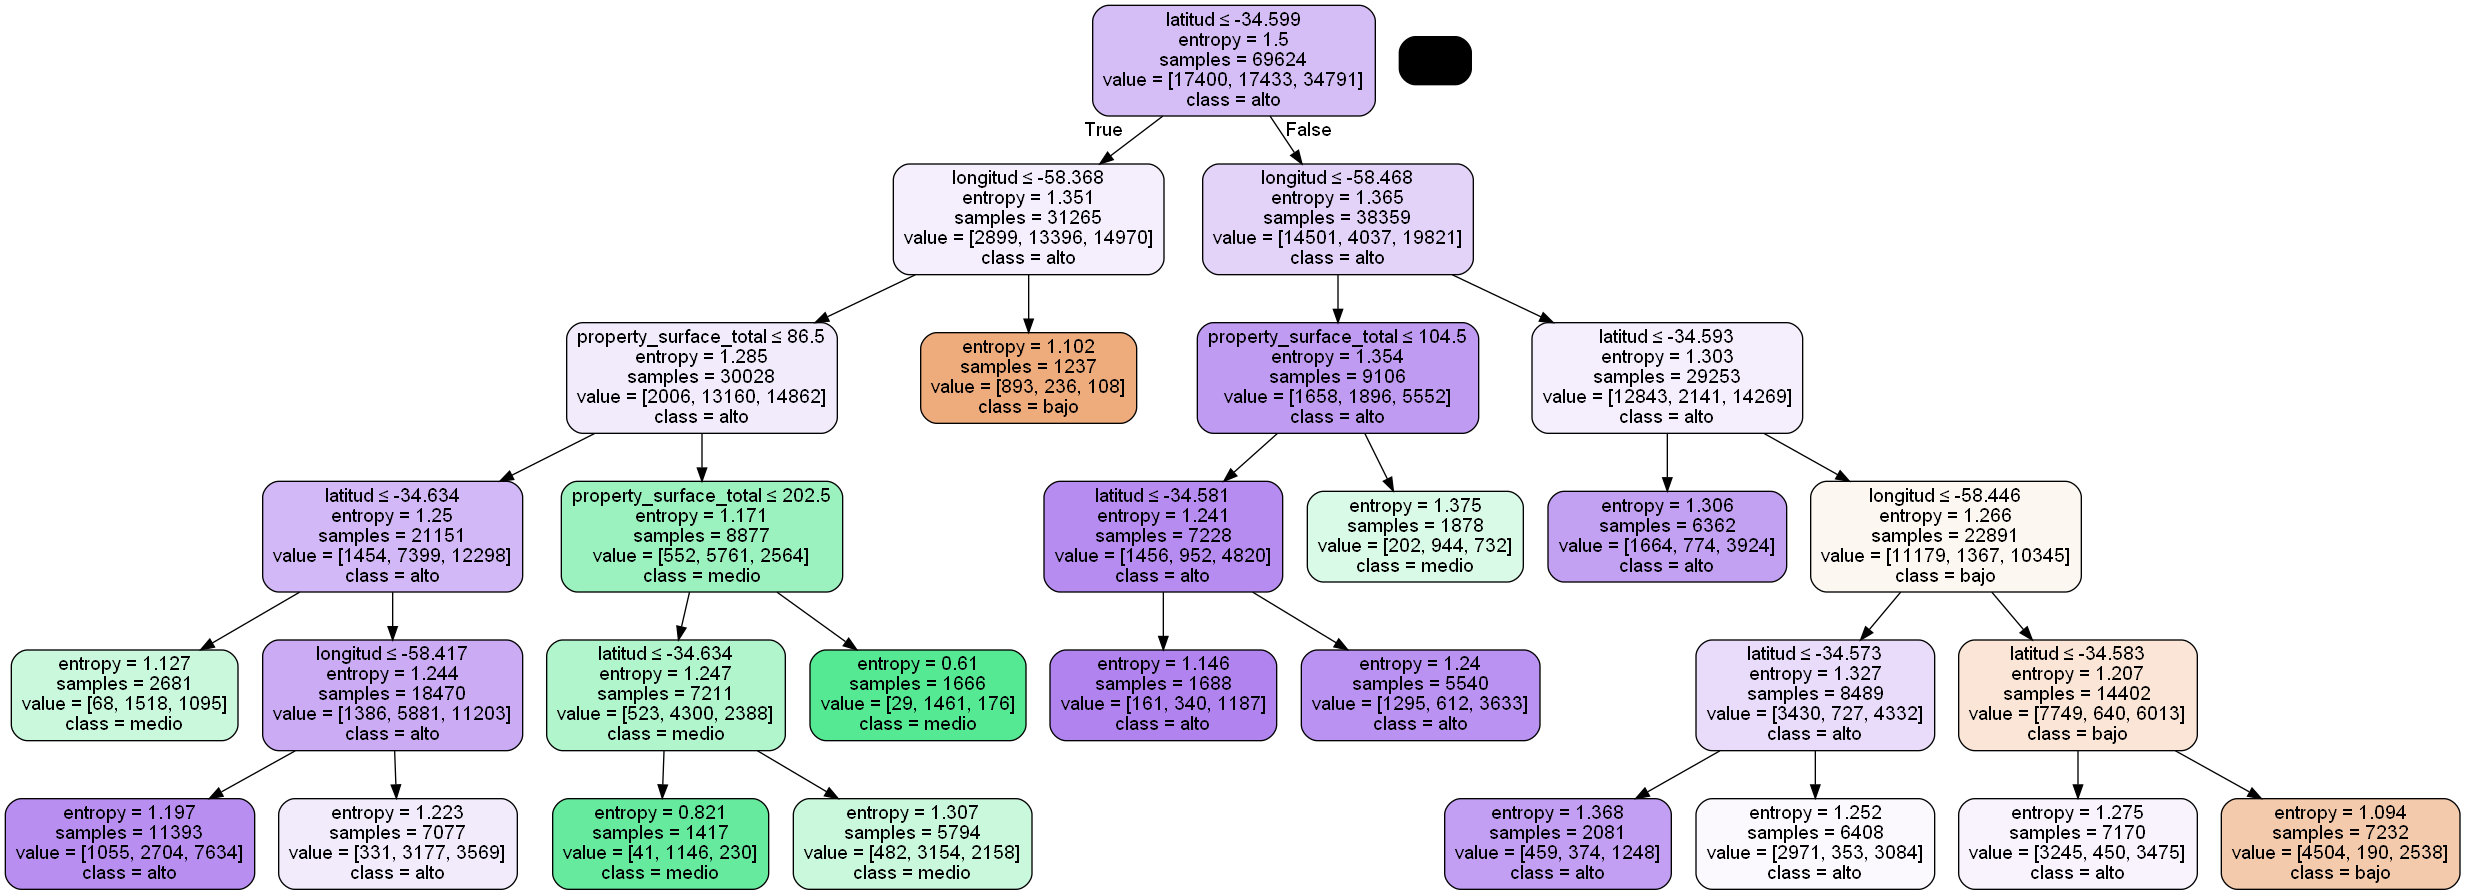

In [ ]:
dot_data = StringIO()
export_graphviz(arbol_rf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

F1-Score: 0.5974607916355489


Text(50.722222222222214, 0.5, 'True')

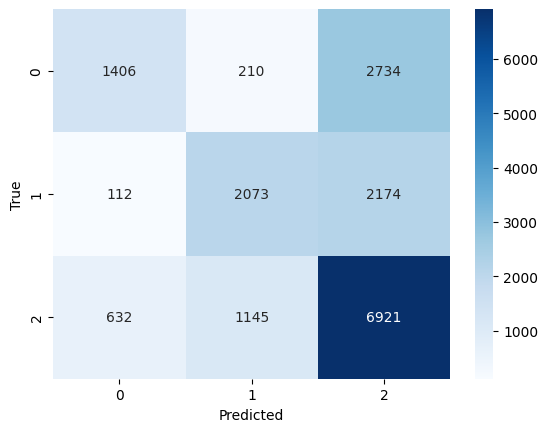

In [ ]:
#Hago predicción sobre el set de evaluacion
y_pred= arbol_rf.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# KNneighborts

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Clasificador
knn=KNeighborsClassifier(n_neighbors=1)



knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred_knn= knn.predict(x_test)

In [ ]:
result = confusion_matrix(y_test, y_pred_knn)

Text(50.722222222222214, 0.5, 'True')

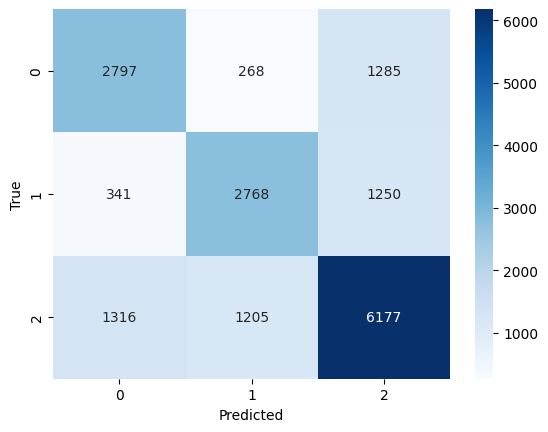

In [ ]:
sns.heatmap(result, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred_knn, average='micro'))) #binary considera la clase positiva por defecto 1


F1-Score: 0.6745562130177515


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, x_train, y_train, cv=15)

In [ ]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 35)}
#use gridsearch to test all values for n_neighbors
knn_2=KNeighborsClassifier()
knn_gscv = GridSearchCV(knn_2, param_grid, cv=5)
knn_gscv.fit(x_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 1}

In [ ]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.6702283684162691
